### Sampling site directional data

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite.smpsite as smp

%matplotlib inline

In [8]:
%%time

params0 = smp.Params(n=20,
                     k=5,
                     kappa_within_site=100,
                     site_lat=30, 
                     site_long=0,
                     outlier_rate=0.05,
                     secular_method="G",
                     kappa_secular=None)


df_sample = smp.generate_samples(params0)

CPU times: user 29.5 ms, sys: 3.26 ms, total: 32.7 ms
Wall time: 32.2 ms


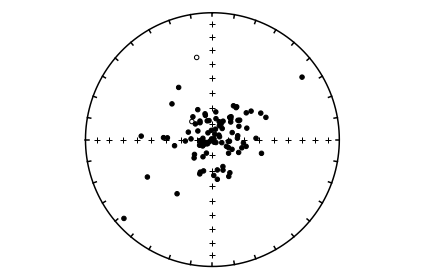

In [9]:
ipmag.plot_net(1)
ipmag.plot_di(dec=df_sample.vgp_long.values, inc=df_sample.vgp_lat.values)